# Skew test

Allen Downey

[MIT License](https://en.wikipedia.org/wiki/MIT_License)

In [13]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

from thinkstats2 import Pmf, Cdf

import thinkstats2
import thinkplot

decorate = thinkplot.config

Suppose you buy a loaf of bread every day for a year, take it
home, and weigh it.  You suspect that the distribution of weights is
more skewed than a normal distribution with the same mean and
  standard deviation.

To test your suspicion, write a definition for a class named
  `SkewTest` that extends `thinkstats.HypothesisTest` and provides
  two methods:

* `TestStatistic` should compute the skew of a given sample.

* `RunModel` should simulate the null hypothesis and return
  simulated data.

In [14]:
class HypothesisTest(object):
    """Represents a hypothesis test."""

    def __init__(self, data):
        """Initializes.

        data: data in whatever form is relevant
        """
        self.data = data
        self.MakeModel()
        self.actual = self.TestStatistic(data)
        self.test_stats = None

    def PValue(self, iters=1000):
        """Computes the distribution of the test statistic and p-value.

        iters: number of iterations

        returns: float p-value
        """
        self.test_stats = np.array([self.TestStatistic(self.RunModel()) 
                                       for _ in range(iters)])

        count = sum(self.test_stats >= self.actual)
        return count / iters

    def MaxTestStat(self):
        """Returns the largest test statistic seen during simulations.
        """
        return np.max(self.test_stats)

    def PlotHist(self, label=None):
        """Draws a Cdf with vertical lines at the observed test stat.
        """
        plt.hist(self.test_stats, color='C4', alpha=0.5)
        plt.axvline(self.actual, linewidth=3, color='0.8')
        plt.xlabel('Test statistic')
        plt.ylabel('Count')
        plt.title('Distribution of the test statistic under the null hypothesis')

    def TestStatistic(self, data):
        """Computes the test statistic.

        data: data in whatever form is relevant        
        """
        raise UnimplementedMethodException()

    def MakeModel(self):
        """Build a model of the null hypothesis.
        """
        pass

    def RunModel(self):
        """Run the model of the null hypothesis.

        returns: simulated data
        """
        raise UnimplementedMethodException()

In [19]:
# Solution goes here
class SkewTest(HypothesisTest):
    def TestStatistic(self, data):
        mean = np.mean(data)
        median = np.median(data)
        std = np.std(data)
        test_stat = 3*(mean - median)/std
        return test_stat
        
    def RunModel(self):
        mean = np.mean(self.data)
        var = np.var(self.data)
        return np.random.normal(mean, var, len(self.data))

To test this class, I'll generate a sample from an actual Gaussian distribution, so the null hypothesis is true.

In [20]:
mu = 1000
sigma = 35
data = np.random.normal(mu, sigma, size=365)

Now we can make a `SkewTest` and compute the observed skewness.

In [21]:
test = SkewTest(data)
test.actual

-0.08335862999425032

Here's the p-value.

In [22]:
test = SkewTest(data)
test.PValue()

0.744

And the distribution of the test statistic under the null hypothesis.

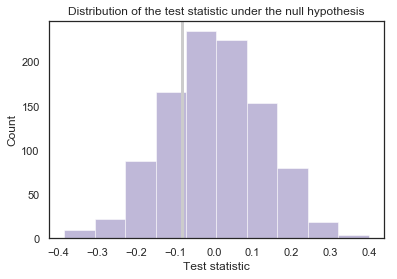

In [23]:
test.PlotHist()

Most of the time the p-value exceeds 5%, so we would conclude that the observed skewness could plausibly be due to random sample.

But let's see how often we get a false positive.

In [26]:
iters = 1000
count = 0

for i in range(iters):
    data = np.random.normal(mu, sigma, size=365)
    test = SkewTest(data)
    p_value = test.PValue()
    if p_value < 0.05:
        count +=1
        
print(count/iters)

0.055


In the long run, the false positive rate is the threshold we used, 5%.